In [77]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [78]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train


,Unnamed: 0,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,...,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
0,0,Afghanistan/1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1,Afghanistan/1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,2,Afghanistan/1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,3,Afghanistan/1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,4,Afghanistan/1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,5598,Zimbabwe/2010,2795.6192,283.6316,109.3055,3.0243,0.0,87.000000,157.6366,262.6108,...,302.3508,0.0,0.0,2074.1869,9410211.0,4676106.0,6034165.0,6805605.0,23601.395453,0.911917
5599,5599,Zimbabwe/2011,2918.2098,168.1659,100.7798,3.7456,0.0,94.000000,268.6740,648.0808,...,312.2478,0.0,0.0,966.3719,9636932.0,4749717.0,6114111.0,6911674.0,23470.631605,0.191167
5600,5600,Zimbabwe/2012,2164.8953,259.4249,103.8422,5.5527,0.0,91.000000,304.6578,648.0808,...,314.3433,0.0,0.0,908.2629,9880721.0,4830105.0,6223803.0,7041528.0,22903.232305,0.337000
5601,5601,Zimbabwe/2013,1544.9329,238.1898,96.8978,5.8016,0.0,73.000000,338.5506,648.0808,...,317.9359,0.0,0.0,546.0138,10138667.0,4915839.0,6363142.0,7192279.0,22245.497305,0.089667


In [79]:
# Mengatur kolom unnamed menjadi index bagi setiap entitas
train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)

## Exploratory Data Analysis


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5603 entries, 0 to 5602
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Negara/Tahun                                 5603 non-null   object 
 1   Emisi Savanna Api                            5578 non-null   float64
 2   Emisi Kebakaran Hutan                        5528 non-null   float64
 3   Emisi Residu Tanaman                         4485 non-null   float64
 4   Emisi Budidaya Padi                          5603 non-null   float64
 5   Emisi Tanah Organik Yang Dikeringkan (Co2)   5603 non-null   float64
 6   Emisi Pembuatan Pestisida                    5603 non-null   float64
 7   Emisi Transportasi Makanan                   5603 non-null   float64
 8   Lahan Hutan                                  5206 non-null   float64
 9   Konversi Hutan Bersih                        5206 non-null   float64
 10  Emisi

Terdapat satu kolom bertipe objek, sisanya bertipe float

In [81]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Emisi Savanna Api,5578.0,1.229654e+03,5.472354e+03,0.000000,0.000000,1.657900e+00,1.143092e+02,1.146164e+05
Emisi Kebakaran Hutan,5528.0,9.242752e+02,3.692585e+03,0.000000,0.000000,6.618500e-01,7.109490e+01,5.222763e+04
Emisi Residu Tanaman,4485.0,9.492051e+02,3.498477e+03,0.000200,10.921100,9.803740e+01,3.562161e+02,3.063853e+04
Emisi Budidaya Padi,5603.0,4.241102e+03,1.759963e+04,0.000000,172.219300,5.155172e+02,1.551411e+03,1.649153e+05
Emisi Tanah Organik Yang Dikeringkan (Co2),5603.0,3.471792e+03,1.548866e+04,0.000000,0.000000,0.000000e+00,6.941645e+02,2.321185e+05
Emisi Pembuatan Pestisida,5603.0,3.275223e+02,1.445485e+03,0.000000,5.000000,1.232828e+01,1.069817e+02,1.645900e+04
Emisi Transportasi Makanan,5603.0,1.823138e+03,5.306418e+03,0.000100,26.262663,1.760653e+02,1.135650e+03,6.204817e+04
Lahan Hutan,5206.0,-1.814565e+04,8.104574e+04,-797183.079000,-3224.371500,-6.953460e+01,0.000000e+00,1.711211e+05
Konversi Hutan Bersih,5206.0,1.845452e+04,1.080050e+05,0.000000,0.000000,4.461600e+01,4.734968e+03,1.605106e+06
Emisi Konsumsi Rumah Tangga Makanan,5214.0,4.290229e+03,2.069181e+04,0.000000,10.011225,1.362674e+02,1.357826e+03,3.446263e+05


In [82]:
train.isnull().sum()

Negara/Tahun                                      0
Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Pupuk 

In [83]:
train.duplicated().sum()

0

In [84]:
train.shape

(5603, 30)

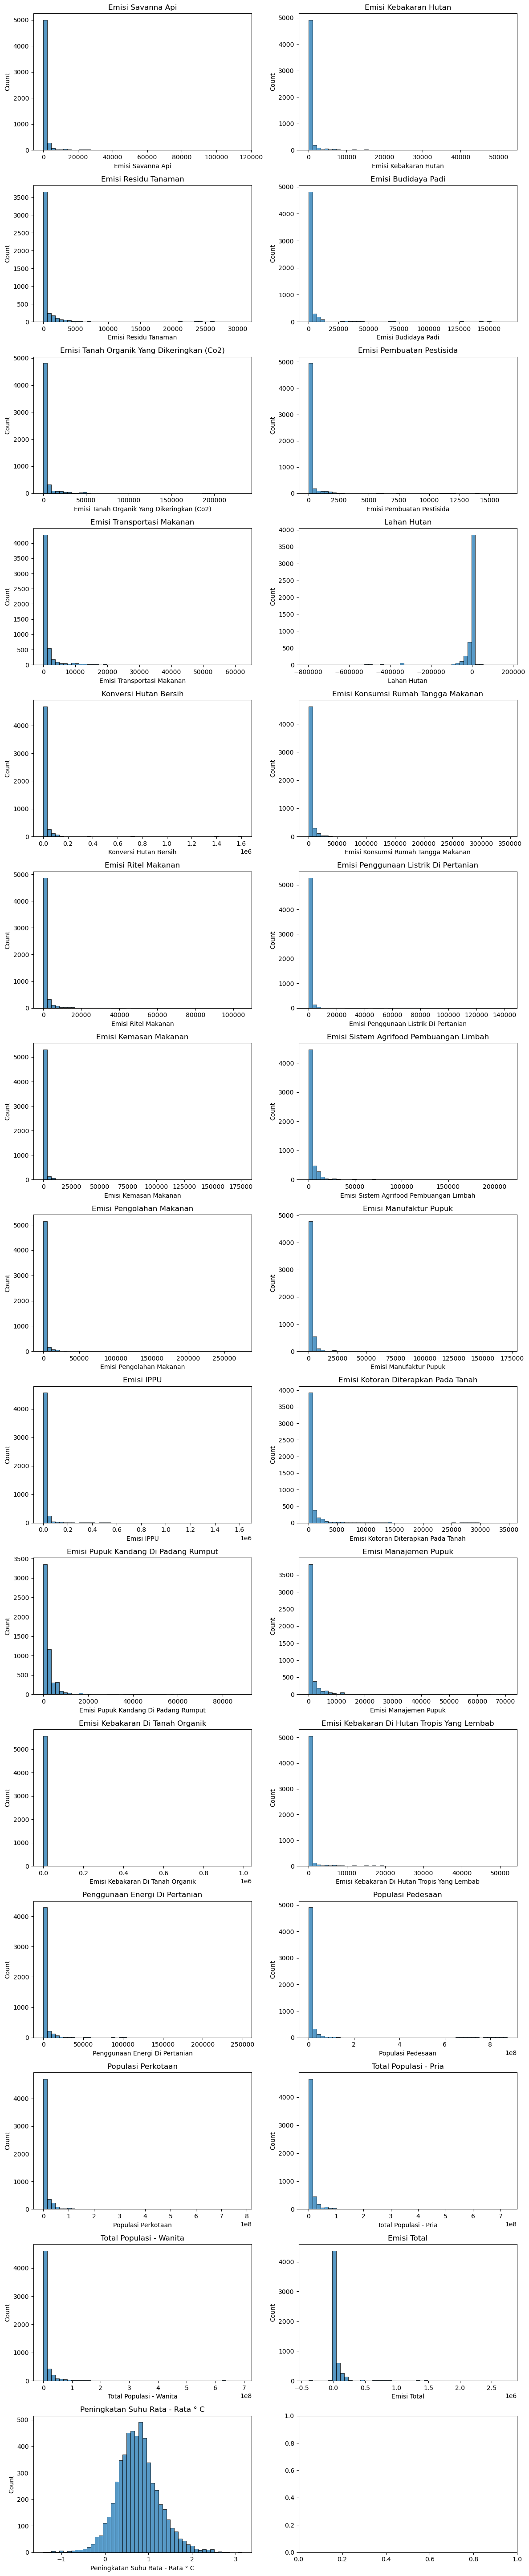

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_to_hist = [col for col in train.columns if col != 'Negara/Tahun']

fig, axes = plt.subplots(len(feature_to_hist) // 2 + len(feature_to_hist) % 2, 2, figsize=(12, len(feature_to_hist) * 2))
axes = axes.flatten()

for i, feature in enumerate(feature_to_hist):
    sns.histplot(train[feature], bins=50, ax=axes[i])  # Menambahkan bins=50
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


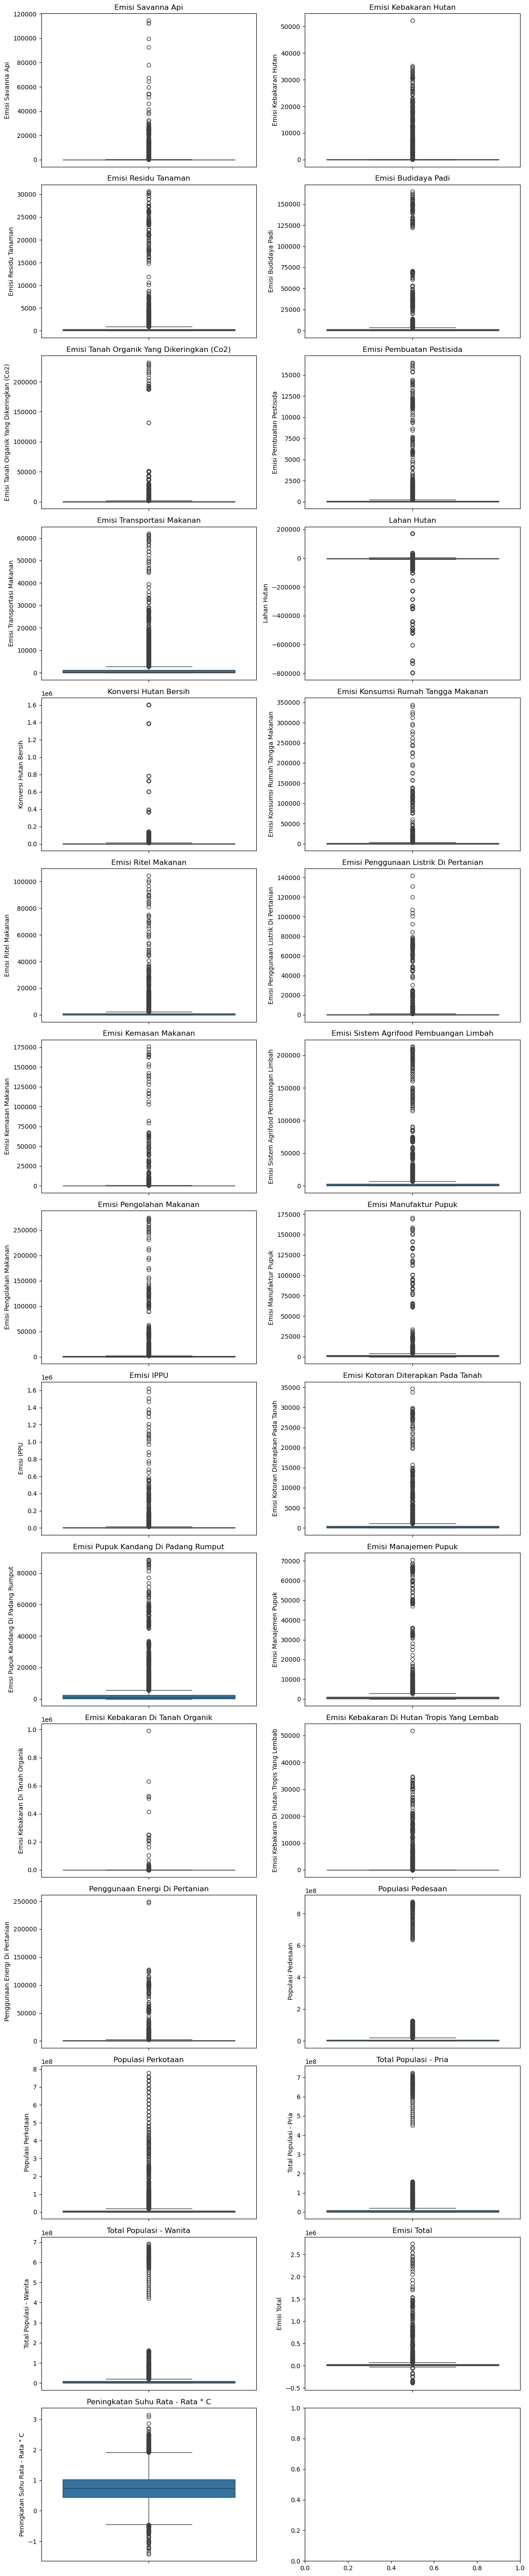

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_to_box = [col for col in train.columns if col != 'Negara/Tahun']

fig, axes = plt.subplots(len(feature_to_box) // 2 + len(feature_to_box) % 2, 2, figsize=(12, len(feature_to_box) * 2))
axes = axes.flatten()

for i, feature in enumerate(feature_to_box):
    sns.boxplot(y=train[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


In [87]:
# Mengecek apakah Emisi Kebakaran Hutan dan Emisi Kebakaran di Hutan tropis overlap
train[(train['Emisi Kebakaran Hutan'] <  train['Emisi Kebakaran Di Hutan Tropis Yang Lembab'])]

,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,...,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
index,,,,,,,,,,,,,,,,,,,,,


In [97]:
train[['Konversi Hutan Bersih', 'Lahan Hutan']]

,Konversi Hutan Bersih,Lahan Hutan
index,,
0,0.0000,2388.8030
1,0.0000,2388.8030
2,0.0000,2388.8030
3,0.0000,2388.8030
4,0.0000,2388.8030
...,...,...
5598,10677.6439,262.6108
5599,10670.8870,648.0808
5600,10670.8870,648.0808


catatan : 
1. luas hutan negatif
2. emisi total negatif
3. fitur redundan total pria wanita
4. emisi kebakaran hutan dan emisi kebakaran di hutan tropis overlap (opsional untuk dihapus)
5. fitur redundan populasi pedesaan dan perkotaan


## Data Preprocessing

In [88]:
# Membenahi nilai luas hutan yang bernilai negatif
train['Lahan Hutan'] = train['Lahan Hutan'].abs()
train['Emisi Total'] = train['Emisi Total'].abs()

# # Menyatukan fitur redundan populasi pria dan wanita
train['Populasi'] = train['Total Populasi - Pria'] + train['Total Populasi - Wanita']
train.drop(columns=['Total Populasi - Pria', 'Total Populasi - Wanita'], inplace=True)

test['Populasi'] = test['Total Populasi - Pria'] + test['Total Populasi - Wanita']
test.drop(columns=['Total Populasi - Pria', 'Total Populasi - Wanita'], inplace=True)

# Memisahkan Negara dan Tahun
train[['Negara', 'Tahun']] = train['Negara/Tahun'].str.split('/', expand=True)
train.drop(columns=['Negara/Tahun'], inplace=True)

test[['Negara', 'Tahun']] = test['Negara/Tahun'].str.split('/', expand=True)
test.drop(columns=['Negara/Tahun'], inplace=True)

In [ ]:
# Membuat kategori temperatur naik dari tahun sebelumnya atau tidak


In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train[(train['Negara']=='Afghanistan')].head()

,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Populasi,Negara,Tahun
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,2198.963539,0.536167,10694796.0,Afghanistan,1990
1,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,2323.876629,0.020667,10745167.0,Afghanistan,1991
2,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,2356.304229,-0.259583,12057433.0,Afghanistan,1992
3,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,2368.470529,0.101917,14003760.0,Afghanistan,1993
4,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,2500.768729,0.372250,15455554.0,Afghanistan,1994


In [117]:
# Ambil 5 sampel dengan suhu positif
positif = train[train['Peningkatan Suhu Rata - Rata ° C'] > 0].sample(5)

# Ambil 5 sampel dengan suhu negatif
negatif = train[train['Peningkatan Suhu Rata - Rata ° C'] < 0].sample(5)

# Gabungkan keduanya
df_sample = pd.concat([positif, negatif])

# Tampilkan hasil
df_sample



,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Populasi,Negara,Tahun
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1345,0.9880,0.0145,11.9141,248.061497,0.0000,34.0,110.4150,69.5346,0.0000,88.7961,109.6096,58.098300,74.091900,247.2681,84.437900,2210.097511,859.0473,33.5659,84.802500,77.0700,0.0,0.0000,85.5134,273398.0,581986.0,4348.257008,0.144750,862418.0,Cyprus,1995
181,0.0000,0.0000,0.0025,246.407276,0.0000,0.0,13.2873,NaN,NaN,7.8627,6.1851,3.277800,172.179779,32.0458,252.214190,1807.613681,3.5083,1.6284,8.888400,1.5025,0.0,0.0000,8.8688,50225.0,25403.0,2565.472527,0.286000,69798.0,Antigua and Barbuda,1996
552,0.0000,0.0000,NaN,1746.105511,0.0000,2.0,13.4144,NaN,NaN,3.0044,0.7418,17.004663,83.780417,6.8585,483.126100,2005.792129,NaN,NaN,6233.579114,NaN,0.0,0.0000,8.5250,0.0,63511.0,10603.932034,0.830359,60604.0,Bermuda,1998
285,99437.1279,4315.2736,2541.1622,1273.334600,2886.2596,1118.0,8084.0356,41464.6137,68313.3939,10848.5147,4829.3570,1485.037100,9885.684100,4809.4224,7900.399900,472.084400,19378.9412,909.5337,28550.365600,6789.2760,0.0,154.6826,5588.5823,3072827.0,16402364.0,248105.854700,0.865250,19475844.0,Australia,2002
4229,6583.8158,11381.6188,7329.0993,1257.536000,50663.3409,1108.0,17461.0614,797183.0790,0.0000,35618.3166,15900.8284,6857.780000,16153.477000,32136.4145,24819.201200,24330.731700,171184.8974,6762.2520,4281.620500,12342.6064,0.0,0.0000,20520.2882,37777378.0,105305809.0,330490.192900,2.138833,143086549.0,Russian Federation,2008
3924,2.0745,12.6610,21.3316,30.560300,680.7975,21.0,261.2012,677.0775,5821.6213,206.6706,105.9047,4.334500,67.631366,1705.1740,242.332715,1.338800,348.0087,71.9431,584.393900,92.7861,0.0,10.6576,90.6473,1145382.0,1825815.0,9705.993281,-0.043917,2943120.0,Panama,1999
1019,29.9029,186.2412,181.8512,196.708700,995.0727,91.0,1061.4948,20763.1020,3010.0184,820.9356,141.2407,24.180800,210.618900,3154.9734,389.143434,65.154500,1787.3104,361.1156,1790.441300,297.3333,0.0,0.0000,929.6168,2246943.0,11424090.0,5038.747366,-0.019500,13782298.0,Chile,1992
1764,0.0000,0.0000,0.0196,246.407276,235.9155,0.0,5.6975,0.0855,0.0000,0.0240,3.8665,17.004663,134.463835,1.9801,386.192572,2005.792129,NaN,1.2782,5.707400,1.8275,0.0,0.0000,311.5994,30835.0,15415.0,3357.690676,-0.054583,44132.0,Faroe Islands,1994
969,5517.3310,2115.7981,77.2497,104.660100,0.0000,2.0,29.8132,37.2057,7663.3333,34.0556,146.6646,5.938400,67.631366,790.5831,209.587728,356.491017,27.3185,71.8929,4407.001000,455.8469,0.0,1290.5473,54.4268,5000829.0,1348260.0,23390.964911,-0.233500,6302927.0,Chad,1992


- pelajari teknik per negara
- kategorikan temperature naik atau turun

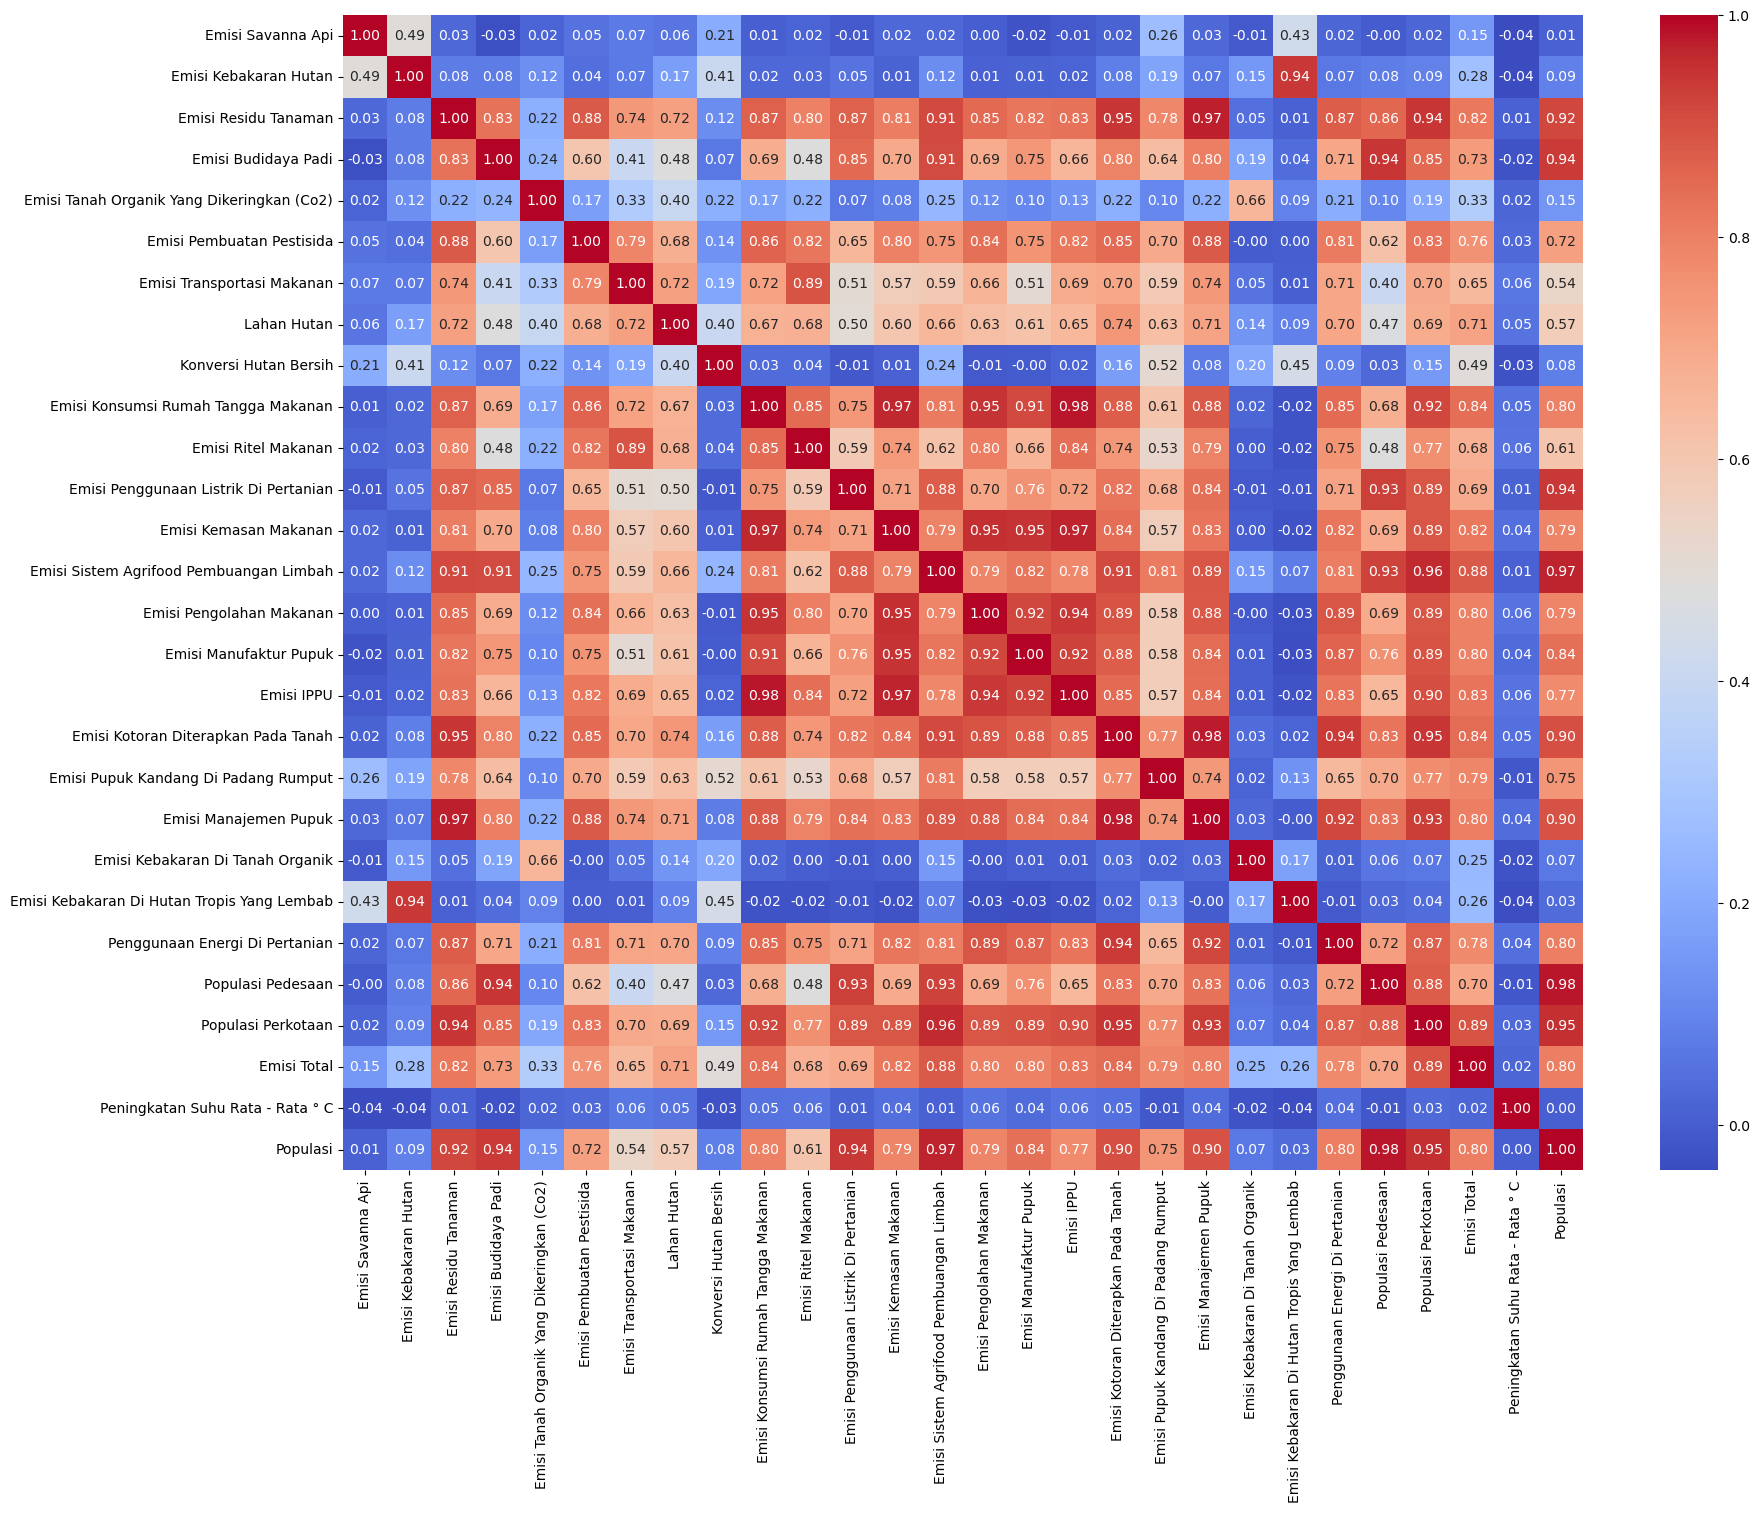

In [91]:
# Melihat korelasi fitur untuk menemukan fitur yang berkorelasi
import matplotlib.pyplot as plt

# Mengukur korelasi antara emisi
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[num_cols].corr()

# Matriks heatmap korelasi
corr_matrix = train[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [90]:
train.isnull().sum()

Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Pupuk Kandang Di Padang Rumput              0
Emisi Manaje

## Feature Engineering


In [ ]:
# Menambahkan kolom total proporsi pedesaan dan perkotaan
total_populasi = train['Populasi Pedesaan'] + train['Populasi Perkotaan']
train['Proporsi Pedesaan'] = train['Populasi Pedesaan'] / total_populasi
train['Proporsi Perkotaan'] = train['Populasi Perkotaan'] / total_populasi

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\2097860481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[['Negara', 'Tahun']] = train_set['Negara/Tahun'].str.split('/', expand=True)
C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\2097860481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[['Negara', 'Tahun']] = train_set['Negara/Tahun'].str.split('/', expand=True)
C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\2097860481.py:3: SettingWithCopy

In [96]:
train.isna().sum().sort_values(ascending=False)

Emisi Residu Tanaman                           1118
Penggunaan Energi Di Pertanian                  782
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Manajemen Pupuk                           752
Emisi IPPU                                      599
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Kebakaran Di Hutan Tropis Yang Lembab     125
Emisi Kebakaran Hutan                            75
Emisi Savanna Api                                25
Emisi Total                                       0
Peningkatan Suhu Rata - Rata ° C                  0
Populasi Perkotaan                                0
Populasi Pedesaan                                 0
Populasi                                          0
Emisi Kebakaran Di Tanah Organik                  0
Negara                                            0
Emisi Manufaktur Pupuk                            0
Emisi Pupuk 

In [17]:
# Membuat fitur baru
train_set["Total Populasi"] = train_set["Total Populasi - Pria"] + train_set["Total Populasi - Wanita"]
train_set["Proporsi Pedesaan"] = train_set["Populasi Pedesaan"] / train_set["Total Populasi"]
train_set["Proporsi Perkotaan"] = train_set["Populasi Perkotaan"] / train_set["Total Populasi"]

train_set["Total Emisi Agrikultur"] = (
    train_set["Emisi Budidaya Padi"] +
    train_set["Emisi Pupuk Kandang Di Padang Rumput"] +
    train_set["Emisi Manajemen Pupuk"] +
    train_set["Emisi Kotoran Diterapkan Pada Tanah"]
)

train_set["Total Emisi Kebakaran"] = (
    train_set["Emisi Kebakaran Hutan"] +
    train_set["Emisi Kebakaran Di Tanah Organik"] +
    train_set["Emisi Kebakaran Di Hutan Tropis Yang Lembab"]
)

train_set["Total Emisi Produksi & Distribusi Makanan"] = (
    train_set["Emisi Transportasi Makanan"] +
    train_set["Emisi Pengolahan Makanan"] +
    train_set["Emisi Manufaktur Pupuk"] +
    train_set["Emisi Pembuatan Pestisida"] +
    train_set["Emisi Kemasan Makanan"] +
    train_set["Emisi Sistem Agrifood Pembuangan Limbah"] +
    train_set["Emisi Konsumsi Rumah Tangga Makanan"] +
    train_set["Emisi Ritel Makanan"]
)

train_set["Total Emisi Energi Pertanian"] = (
    train_set["Penggunaan Energi Di Pertanian"] + train_set["Emisi Penggunaan Listrik Di Pertanian"]
)

train_set["Total Deforestasi"] = train_set["Lahan Hutan"] - train_set["Konversi Hutan Bersih"]

train_set["Total Emisi Industri"] = train_set["Emisi IPPU"] + train_set["Emisi Manufaktur Pupuk"]

drop_columns = [
    "Total Populasi - Pria", "Total Populasi - Wanita", "Populasi Pedesaan", "Populasi Perkotaan",
    "Emisi Budidaya Padi", "Emisi Pupuk Kandang Di Padang Rumput", "Emisi Manajemen Pupuk", "Emisi Kotoran Diterapkan Pada Tanah",
    "Emisi Kebakaran Hutan", "Emisi Kebakaran Di Tanah Organik", "Emisi Kebakaran Di Hutan Tropis Yang Lembab",
    "Emisi Transportasi Makanan", "Emisi Pengolahan Makanan", "Emisi Manufaktur Pupuk", "Emisi Pembuatan Pestisida",
    "Emisi Kemasan Makanan", "Emisi Sistem Agrifood Pembuangan Limbah", "Emisi Konsumsi Rumah Tangga Makanan", "Emisi Ritel Makanan",
    "Penggunaan Energi Di Pertanian", "Emisi Penggunaan Listrik Di Pertanian", "Lahan Hutan", "Konversi Hutan Bersih",
    "Emisi IPPU"
]
train_set.drop(columns=drop_columns, inplace=True)

# Menampilkan dataset setelah feature engineering
train_set.head()


C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\4114057897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["Total Populasi"] = train_set["Total Populasi - Pria"] + train_set["Total Populasi - Wanita"]
C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\4114057897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["Proporsi Pedesaan"] = train_set["Populasi Pedesaan"] / train_set["Total Populasi"]
C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\41140578

,Emisi Savanna Api,Emisi Residu Tanaman,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Total,Peningkatan Suhu Rata - Rata ° C,Negara,Tahun,Total Populasi,Proporsi Pedesaan,Proporsi Perkotaan,Total Emisi Agrikultur,Total Emisi Kebakaran,Total Emisi Produksi & Distribusi Makanan,Total Emisi Energi Pertanian,Total Deforestasi,Total Emisi Industri
0,14.7237,205.6077,0.0,2198.963539,0.536167,Afghanistan,1990,10694796.0,0.902791,0.242543,2855.8513,0.0557,1287.283739,NaN,-2388.803,221.9748
1,14.7237,209.4971,0.0,2323.876629,0.020667,Afghanistan,1991,10745167.0,0.952102,0.257154,2946.3335,0.0557,1313.612629,NaN,-2388.803,229.8927
3,14.7237,230.8175,0.0,2368.470529,0.101917,Afghanistan,1993,14003760.0,0.846779,0.231153,2942.9791,0.0557,1358.428329,NaN,-2388.803,215.2616
4,14.7237,242.0494,0.0,2500.768729,0.372250,Afghanistan,1994,15455554.0,0.821072,0.225330,3030.2596,0.0557,1411.796629,NaN,-2388.803,197.4174
6,38.9302,249.0364,0.0,2838.921329,0.036583,Afghanistan,1996,17106596.0,0.815638,0.226234,3361.9229,0.2014,1404.988329,NaN,-2388.803,182.3765


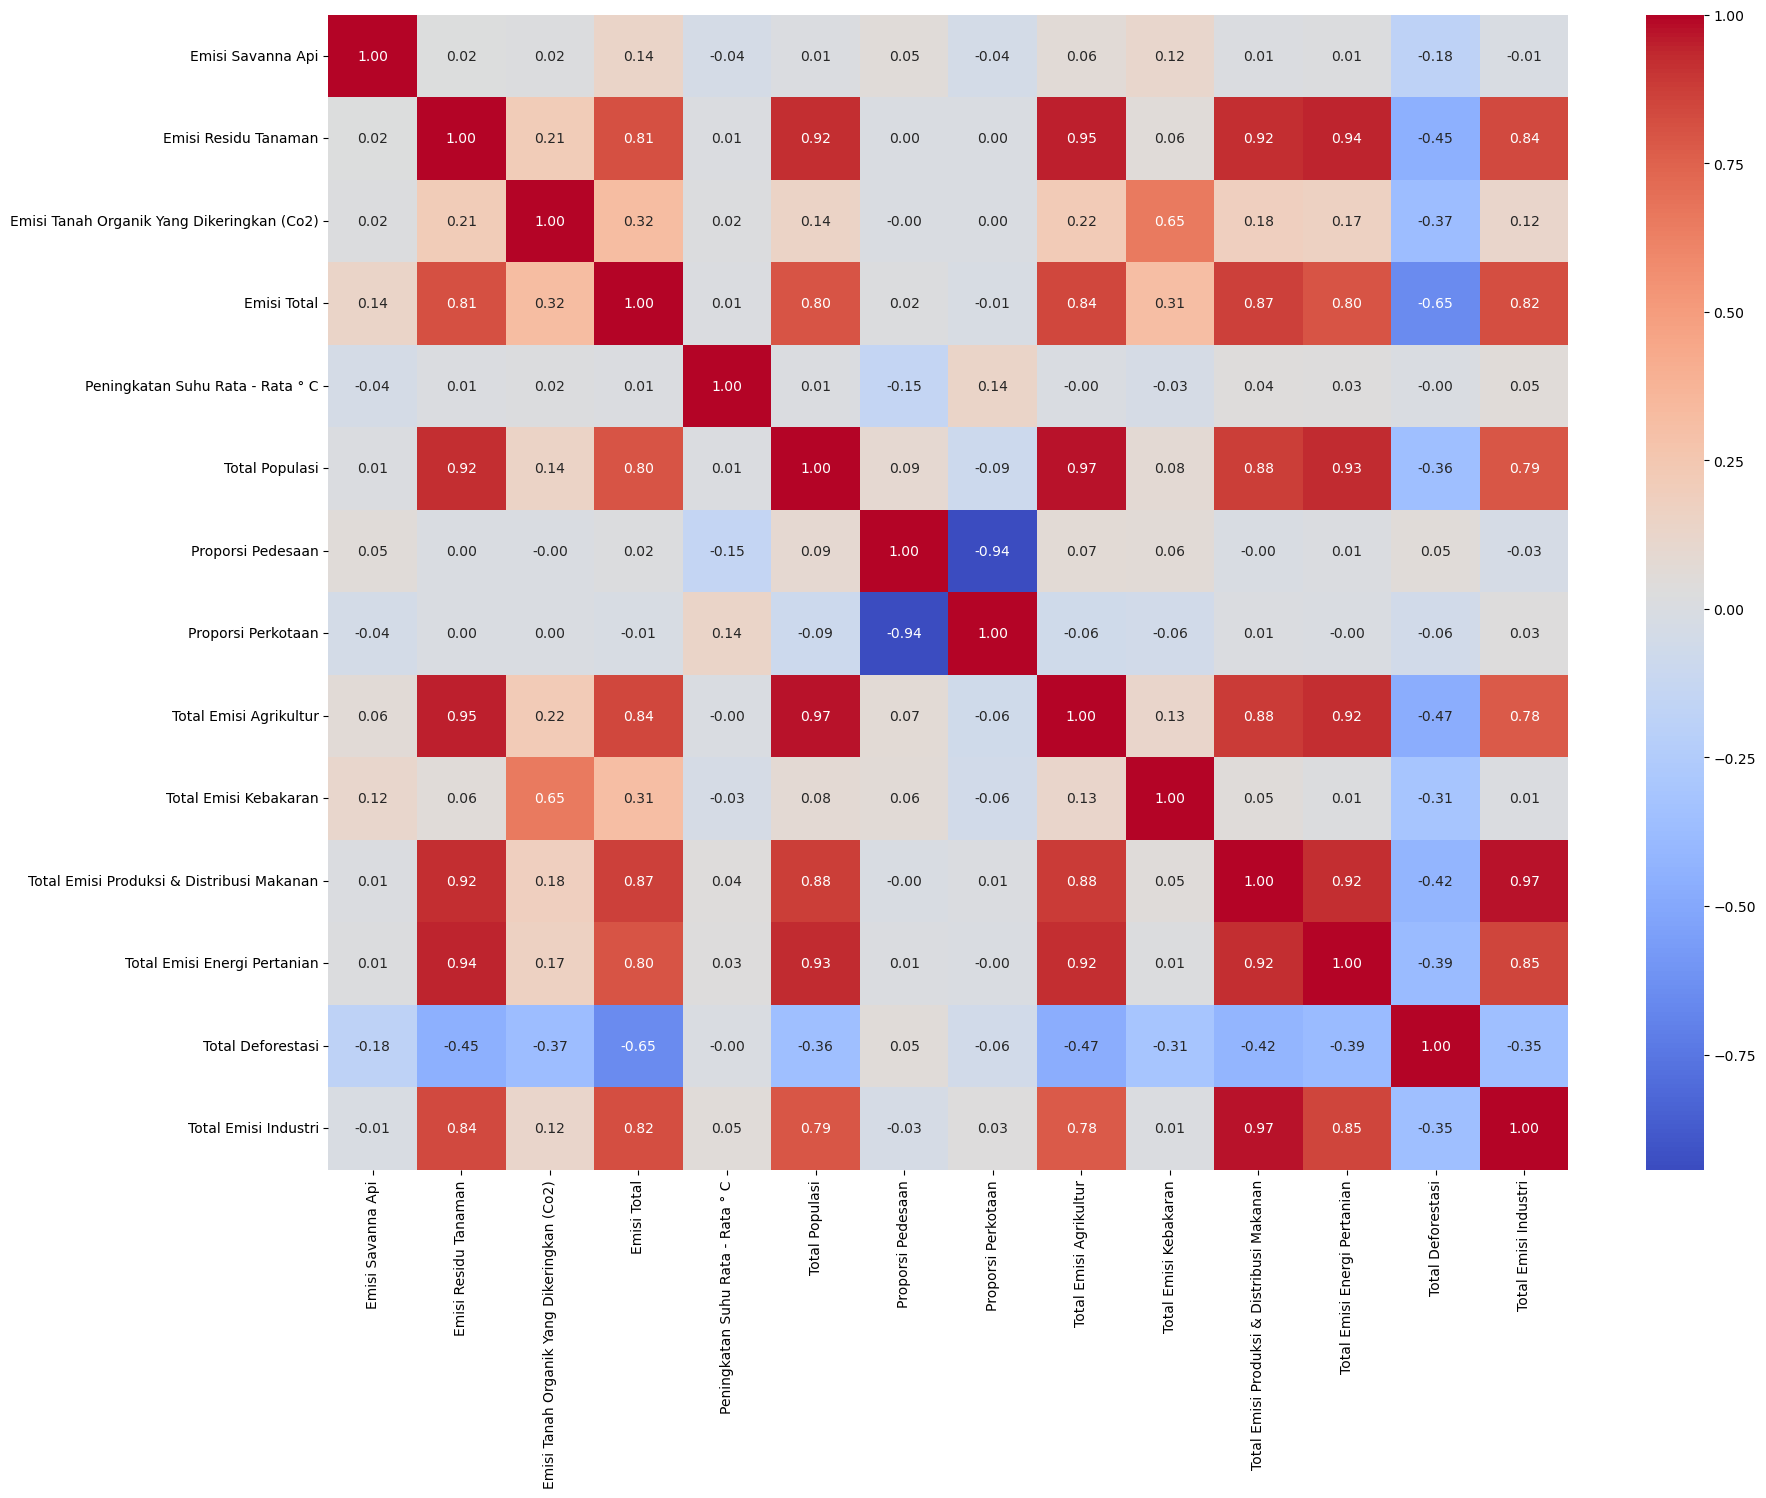

In [18]:
# Melihat korelasi fitur untuk menemukan fitur yang berkorelasi
import matplotlib.pyplot as plt

# Mengukur korelasi antara emisi
num_cols = train_set.select_dtypes(include=['int64', 'float64']).columns
train_set[num_cols].corr()

# Matriks heatmap korelasi
corr_matrix = train_set[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [19]:
%pip install scikit-learn

import sklearn 
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Contoh: Membaca dataset
# df = pd.read_csv("data.csv")

# Memilih fitur numerik untuk polinomial
numerical_features = [
    "Total Populasi", "Proporsi Pedesaan", "Proporsi Perkotaan",
    "Total Emisi Agrikultur", "Total Emisi Kebakaran", "Total Emisi Produksi & Distribusi Makanan",
    "Total Emisi Energi Pertanian", "Total Deforestasi", "Total Emisi Industri"
]

# Mengisi nilai NaN dengan median agar tidak ada error saat transformasi
train_set[numerical_features] = train_set[numerical_features].fillna(train_set[numerical_features].median())

# Membuat fitur polinomial derajat 2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(train_set[numerical_features])

# Membuat DataFrame baru dengan nama kolom yang sesuai
poly_feature_names = poly.get_feature_names_out(numerical_features)
train_set_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Menggabungkan fitur polinomial dengan dataset asli
train_set = pd.concat([train_set, train_set_poly], axis=1)

# Menampilkan dataset dengan fitur polinomial
print(train_set.head())


Note: you may need to restart the kernel to use updated packages.
   Emisi Savanna Api  Emisi Residu Tanaman  \
0            14.7237              205.6077   
1            14.7237              209.4971   
3            14.7237              230.8175   
4            14.7237              242.0494   
6            38.9302              249.0364   

   Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Total  \
0                                         0.0  2198.963539   
1                                         0.0  2323.876629   
3                                         0.0  2368.470529   
4                                         0.0  2500.768729   
6                                         0.0  2838.921329   

   Peningkatan Suhu Rata - Rata ° C       Negara Tahun  Total Populasi  \
0                          0.536167  Afghanistan  1990      10694796.0   
1                          0.020667  Afghanistan  1991      10745167.0   
3                          0.101917  Afghanistan  1993      14

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\2823883944.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[numerical_features] = train_set[numerical_features].fillna(train_set[numerical_features].median())
